# Assignment 3: Data Visualisation
Using the earthquake [dataset](https://www.kaggle.com/datasets/farazrahman/earthquake?resource=download), produce a series of visualisations demonstrating the use of Matplotlib.

You should produce at least one of the following: 
- Bar Graph.
- Pie Chart.
- Box Plot.
- Line Chart.
- Scatter Plot.

Once you have demonstrated use of the different plots you should look at the data and make some conclusions from the data set. Can you find any links?

Present your conclusion illustrated with appropriate visualisations.

Submit your completed notebook.

### Executive Summary
- 99% measurements are either in Mb, Mb_lg and Md units
- 98% of measured seismic events are earthquakes
- The earthquakes mostly occur along fault lines and the majority occur in the North-West corner of the globe
- The number of earthquakes decreases throughout the month

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import shapefile

## Initial Examination of Data
- The data are seismic events that have occurred globally in the past 30 days

In [2]:
CSV_FILE = 'data/all_month.csv'
earthquake = pd.read_csv(CSV_FILE)
earthquake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.31,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.34,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.16,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.07,0.160,11.0,automatic,nc,nc


In [3]:
# Show an overview of the DataFrame
earthquake.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,8886.000000,8886.000000,8886.000000,8886.000000,7092.000000,7092.000000,5965.000000,8886.000000,6349.000000,8886.000000,7076.000000,7090.000000
mean,39.308700,-111.205884,22.779244,1.636482,24.467851,109.605255,0.553678,0.276822,1.638979,2.037707,0.247804,16.977292
std,18.276848,68.838488,51.627071,1.223509,23.427687,63.652406,2.196805,0.273490,2.914440,6.507358,0.390754,29.095417
min,-65.494800,-179.957700,-3.160000,-1.270000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.408500,-150.502125,3.000000,0.830000,10.000000,64.000000,0.012000,0.090000,0.250000,0.440000,0.110000,6.000000
50%,38.816250,-122.264500,7.738300,1.420000,18.000000,91.000000,0.053830,0.170000,0.450000,0.750000,0.173000,11.000000
75%,53.236350,-114.302992,16.490000,2.050000,32.000000,140.000000,0.139100,0.420000,1.000000,1.500000,0.244314,19.000000
max,80.512900,179.884600,660.826000,7.500000,598.000000,344.000000,43.556000,3.250000,17.780000,449.100000,5.180000,722.000000


Longitude & latitude, clockwise
80.512900
-179.957700
179.884600
-65.494800


In [4]:
# check for NaNs in DataFrame
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1794
gap                1794
dmin               2921
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2537
depthError            0
magError           1810
magNst             1796
status                0
locationSource        0
magSource             0
dtype: int64

Observations:
- nst, gap, horizontalError, magError and magNst all have `null` values
- These `null` values may need to be removed or imputed in later analyses

In [5]:
earthquake.shape

(8886, 22)

In [6]:
earthquake.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

### String type columns

In [7]:
object_type_columns = earthquake.columns.where(earthquake.dtypes == 'object').dropna()
earthquake[object_type_columns].head()

,time,magType,net,id,updated,place,type,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,md,nc,nc73990876,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,md,nc,nc73990871,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,ml,ak,ak024tslkck,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,ml,ci,ci40461911,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,md,nc,nc73990856,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,automatic,nc,nc


Definitions of string type columns:
- Referred to as `object` type but are of type `string`
- `time` and `updated` should be converted to a datetime for further analysis
- `magType`: The method or algorithm used to calculate the preferred magnitude for the event
- `net`: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event
- `id`: Unique identifier for a specific version of a product
- `place`: Textual description of named geographic region near to the event
- `type`: Type of seismic event
- Indicates whether the event has been reviewed by a human (reviewed means reviewed by a humen, automatic means directly posted by automatic processing systems)
- `locationSource`: The network that originally authored the reported location of this event
- `magSource`: Network that originally authored the reported magnitude for this event

For each column, we should consider how relevent it is to the final analysis

Term definitions found [here](https://earthquake.usgs.gov/data/comcat/data-eventterms.php)

Notes:
- need to know if magnitude values from different magTypes are comparible to each other
- net, id, locationSource and magSource may not be of interest
- place may have little value since latitude and longitude are given

### Float type columns
- Need to find out what the columns mean

## Visualise Data
### Type of Seismic Event

In [8]:
def counts_and_labels(df: pd.DataFrame, column: str) -> tuple[list, list]:
    counts = earthquake[column].value_counts().tolist()
    labels = np.unique(earthquake[column].values).tolist()
    return counts, labels


seismic_event_counts, labels = counts_and_labels(earthquake, 'type')

# show types and counts
print(labels)
print(seismic_event_counts)

['earthquake', 'explosion', 'ice quake', 'quarry blast']
[8746, 82, 39, 19]


In [9]:
def plot_pie(title: str, counts: list, labels: list[str]) -> None:
    fig = plt.figure(figsize=(12,8))
    fig.suptitle(title, fontsize=20)
    plt.pie(counts)

    # calculate percentage for each type of seismic event
    total = sum(counts)
    percentages = map(lambda n: n * 100.0 / total, counts)

    # add all data in legend of pie chart, otherwise the text overlaps 
    legend = [f'{label.capitalize()} - {pct:.1f}%' for label, pct in zip(labels, percentages)]
    plt.legend(legend, loc="best")

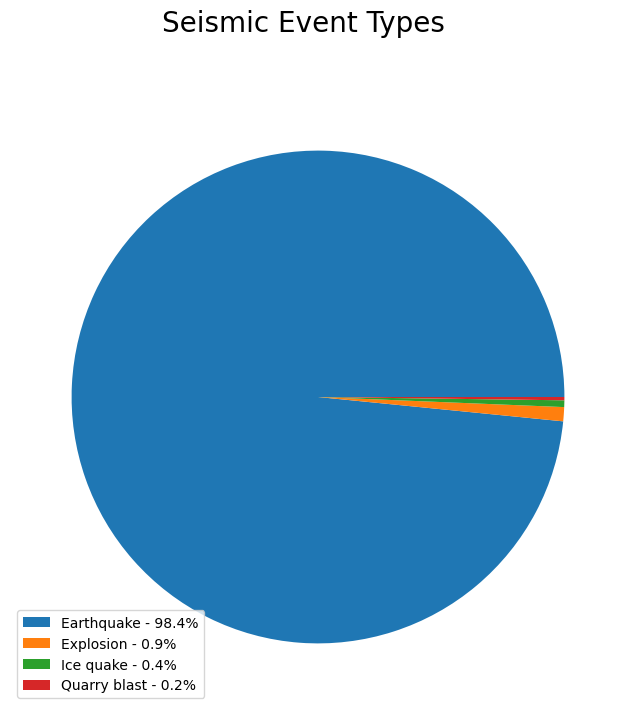

In [10]:
plot_pie('Seismic Event Types', seismic_event_counts, labels)

### magType

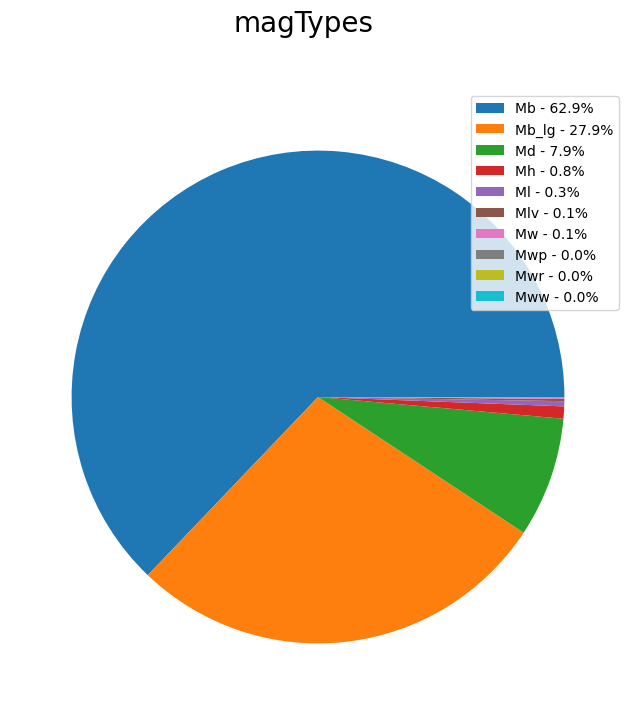

In [11]:
plot_pie('magTypes', *counts_and_labels(earthquake, 'magType'))

#### Analysis
- Mb, Mb_lg and Md cover 98.7% of all measurements
- When comparing magnitudes, good value may be gained from converting Mb_lg and Md to Mb

### Quantitative Data

In [12]:
earthquake['id'].unique().size # each id is unique

8886

In [13]:
quantitative_column_names = list(filter(lambda x: x not in object_type_columns, earthquake.columns.tolist()))
quantitative_column_names

['latitude',
 'longitude',
 'depth',
 'mag',
 'nst',
 'gap',
 'dmin',
 'rms',
 'horizontalError',
 'depthError',
 'magError',
 'magNst']

### Plot Locations of Seismic Activity 

In [14]:
# Read shapefile of coastline co-ordinates
# Data taken from: https://osmdata.openstreetmap.de/data/coastlines.html
coastline_file = 'data\\coastlines-split-4326\\lines.shp'
sf = shapefile.Reader(coastline_file)

In [15]:
# define bounding box for co-ords that we're interested in
bbox = [
    earthquake['longitude'].min(), # left
    earthquake['latitude'].min(),  # bottom
    earthquake['longitude'].max(), # right
    earthquake['latitude'].max()   # top
]
print(f'Bounding box: {bbox}')

Bounding box: [-179.9577, -65.4948, 179.8846, 80.5129]


In [16]:
# Move the relevant points from the shapefile 
# into a np array. Takes a minute or so.
points = []
for shape in sf.iterShapes():
    if all([shape.bbox[0] >= bbox[0],
            shape.bbox[1] >= bbox[1],
            shape.bbox[2] <= bbox[2],
            shape.bbox[3] <= bbox[3]
    ]):   
        for point in shape.points:
            points.append(point)

points = np.array(points)
points.shape

(71362971, 2)

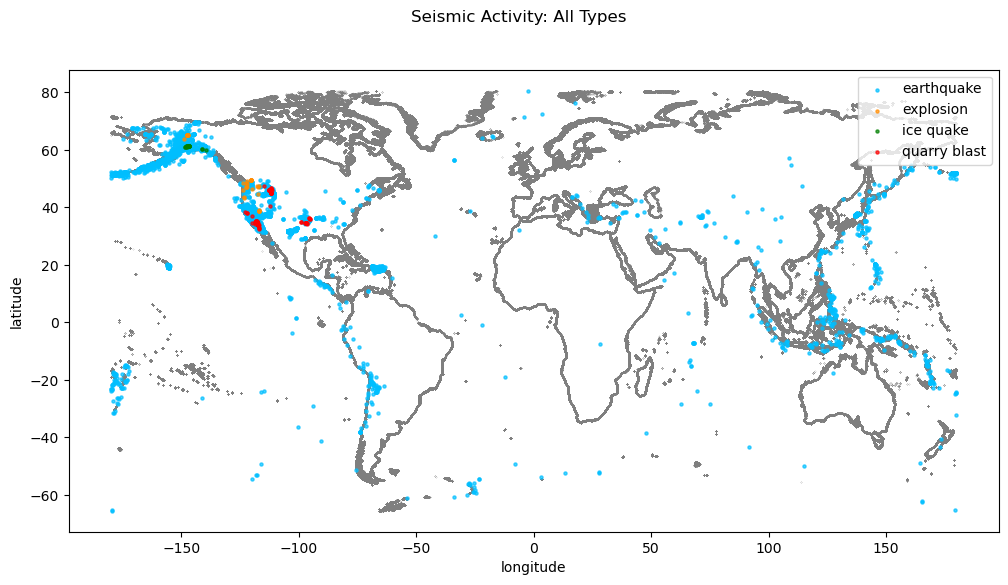

In [17]:
# Plot seismic activity

# colors and labels
CSS_COLORS = (
    mcolors.CSS4_COLORS['deepskyblue'], 
    mcolors.CSS4_COLORS['darkorange'],
    mcolors.CSS4_COLORS['green'],
    mcolors.CSS4_COLORS['red']
)
TABLEAU_COLORS = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red',)
plot_colors = CSS_COLORS
seismic_types = sorted(earthquake['type'].unique().tolist())

# plot coastlines
fig = plt.figure(figsize=(12, 6))
plt.scatter(points[:, 0], points[:, 1], s=0.01, c='tab:gray', alpha=0.1)

# plot seismic events
handles = []
for seismic_type, color in zip(seismic_types, plot_colors):
    handles.append(
        plt.scatter(
            earthquake['longitude'].where(earthquake['type'] == seismic_type).dropna(),
            earthquake['latitude'].where(earthquake['type'] == seismic_type).dropna(),
            s=5.0,
            c=color,
            alpha=0.7,
            label=seismic_type
        )
    )

fig.suptitle('Seismic Activity: All Types')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(handles=handles, loc='upper right')


#### Analysis
Comparing to the image below, it can be seen that the seismic activity caused by earthquakes mostly happens along the fault lines where tectonic plates meet.

Most noticiably, where the:
- Pacific and North American plates move along side each other;
- Nazca and South American plates move into each other;
- Eurasian and Pacific plates move into each other;
- and Indo-Austrailian plate moves into Eurasian plate

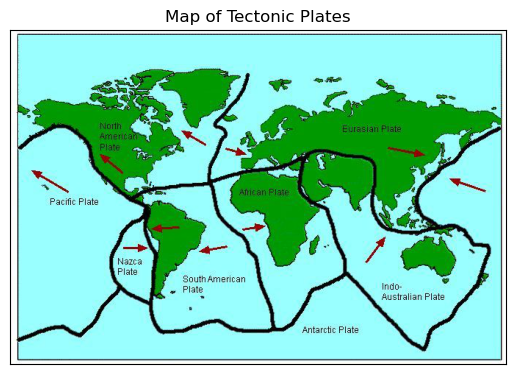

In [18]:
with Image.open('img\\fault_lines.jpg') as img:
    plt.imshow(img)
    plt.title('Map of Tectonic Plates')
    # remove axes markings
    plt.xticks([])
    plt.yticks([])


Map credit: https://zipcodemapblog.blogspot.com/2020/06/earthquake-fault-lines-world-map.html

### Earthquake Stats by Region
- e.g. NE, NW, SW, SE
- Using quadrant as region since it is a relatively easy way to compare regions
  - Further analysis may divide regions into continents, or even countries

In [19]:
only_earthquake = earthquake.where(earthquake['type'] == 'earthquake').dropna()

north = only_earthquake['latitude'] > 0.0
east = only_earthquake['longitude'] > 0.0
south = only_earthquake['latitude'] <= 0.0
west = only_earthquake['longitude'] <= 0.0

df_north_east = only_earthquake[north & east].dropna()
df_south_east = only_earthquake[south & east].dropna()
df_south_west = only_earthquake[south & west].dropna()
df_north_west = only_earthquake[north & west].dropna()

labels=['North-East', 'South-East', 'South-West', 'North-West']
quadrant_dfs = [df_north_east, df_south_east, df_south_west, df_north_west]

#### Magnitude of Earthquakes

Text(0.5, 0, 'Region')

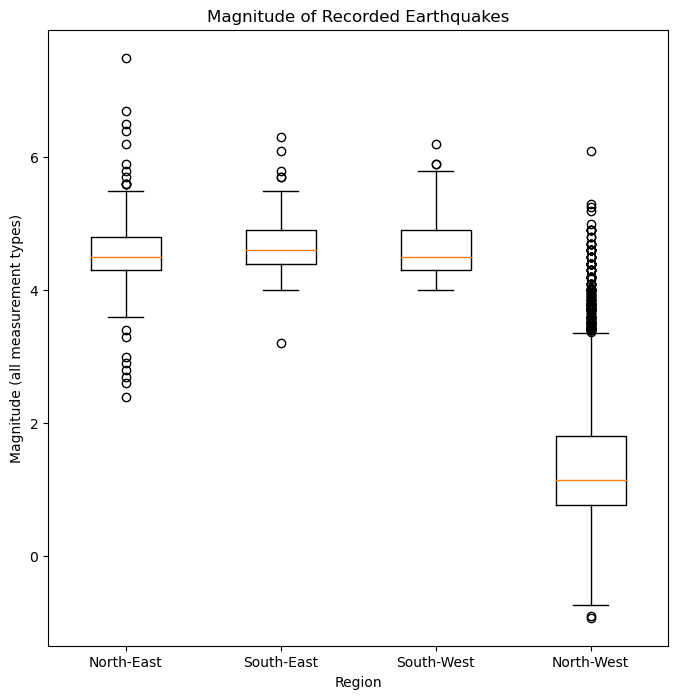

In [20]:
fig = plt.figure(figsize=(8,8))
region_mags = [region['mag'] for region in quadrant_dfs]
plt.boxplot(region_mags, labels=labels)
plt.title('Magnitude of Recorded Earthquakes')
plt.ylabel('Magnitude (all measurement types)')
plt.xlabel('Region')

This shows that there are earthquakes with magnitude less than 0 in the North-West region!

In [21]:
num_negative = only_earthquake[only_earthquake['mag'] < 0.0]['mag'].count()
print(f'Number of earthquakes with magnitude less than zero: {num_negative}')

Number of earthquakes with magnitude less than zero: 75


Apparently, negative magnitudes are possible on the Richter scale (since it is logarithmic). See this article: https://www.britannica.com/science/Richter-scale

In [22]:
# check measure type for magnitudes < 0
# they should be denoted ML
less_than_zero = only_earthquake[only_earthquake['mag'] < 0.0]
less_than_zero['magType'].value_counts()

magType
md    69
ml     6
Name: count, dtype: int64

The md scale is also logarithmic so I think negative values are allowed

#### Analysis
- North-West region has the lowest magnitude earthquakes
- However, since multiple scales are used, this may not be an apples-to-apples comparison

Text(0, 0.5, 'Magnitude (mb)')

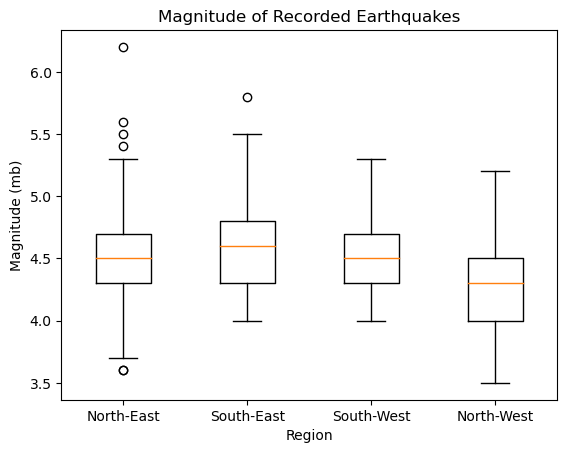

In [23]:
# Compare using mb, the most common magType, according
# to the pie chart at the top of the notebook.
region_mags_mb = [df.where(df['magType'] == 'mb')['mag'].dropna() for df in quadrant_dfs]
plt.boxplot(region_mags_mb, labels=labels)
plt.title('Magnitude of Recorded Earthquakes')
plt.xlabel('Region')
plt.ylabel('Magnitude (mb)')


In [24]:
print('Mean and Standard Deviation of Earthquakes')
for region_name, mag in zip(labels, region_mags):
    print(f'{region_name}: u={mag.mean()}, std={mag.std()} mb')

Mean and Standard Deviation of Earthquakes
North-East: u=4.531496062992126, std=0.5046156620952498 mb
South-East: u=4.664071856287425, std=0.42909565267305966 mb
South-West: u=4.653672316384181, std=0.4410737994472222 mb
North-West: u=1.377582992269213, std=0.8959018472476243 mb


#### Analysis
- Using the same scale, it seems that each region has a similar distribution of earthquake magnitudes
- The means area close with similar deviations

#### Number of Earthquakes

Text(0.5, 0, 'Region')

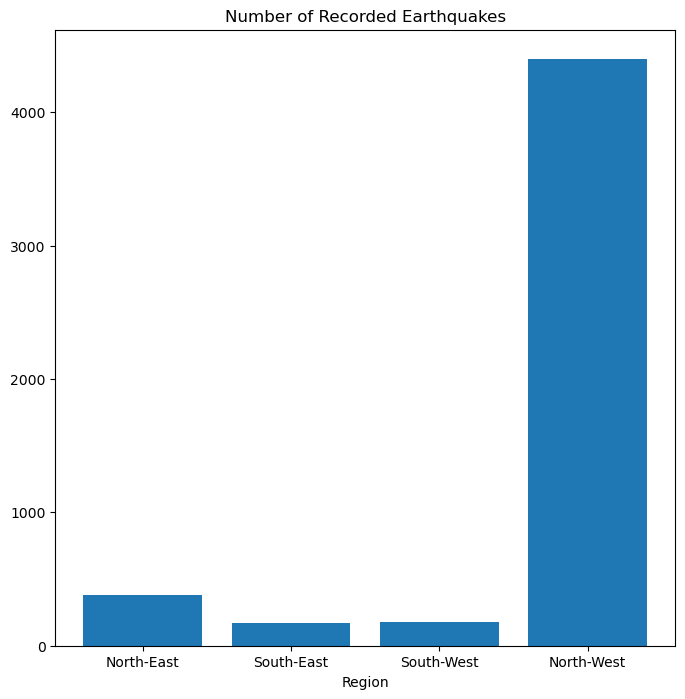

In [25]:
num_earthquakes = [df['mag'].count() for df in quadrant_dfs]
fig = plt.figure(figsize=(8,8))
plt.bar(x=labels, height=num_earthquakes)
plt.title('Number of Recorded Earthquakes')
plt.xlabel('Region')

#### Earthquakes over Time

In [26]:
df_mb_mags = only_earthquake.where(only_earthquake['magType'] == 'mb').dropna()
df_mb_mags['time'] = pd.to_datetime(df_mb_mags['time'])

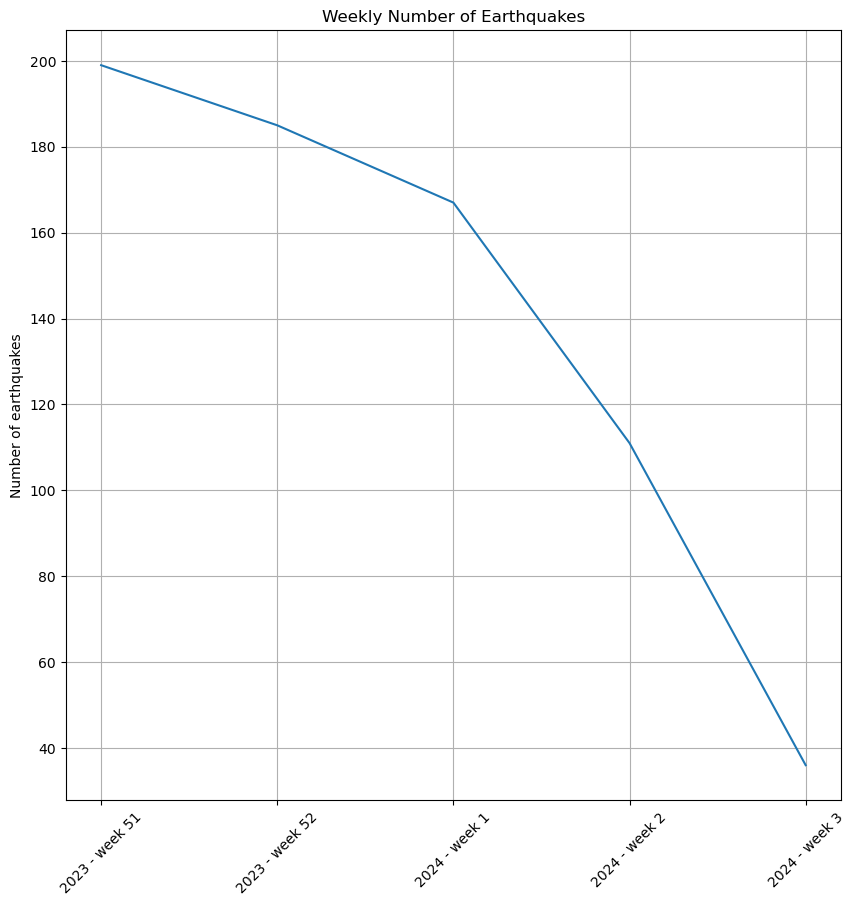

In [27]:
df_mb_mags['week'] = df_mb_mags['time'].apply(lambda t: t.week)
earthquakes_per_week = df_mb_mags.groupby('week').count()
earthquakes_per_week = earthquakes_per_week.loc[[51, 52, 1, 2, 3], 'mag']


def format_week_number(week_number: str) -> str:
    if week_number > 50:
        return f'2023 - week {week_number}'
    else:
        return f'2024 - week {week_number}'


week_numbers = [format_week_number(week_number) for week_number in earthquakes_per_week.index.values]

fig = plt.figure(figsize=(10,10))
plt.plot(week_numbers, earthquakes_per_week.values)
plt.title('Weekly Number of Earthquakes')
plt.ylabel('Number of earthquakes')
plt.xticks(rotation=45)
plt.grid(visible=True)


In [28]:
# Check whether the first and last recorded weeks are full weeks
int2weekday = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

week3 = df_mb_mags.where(df_mb_mags['week'] == 3).dropna()
last_day = int2weekday[week3.loc[:, 'time'].max().weekday()]
print(f'Last recorded day in week 3: {last_day}')

week51 = df_mb_mags.where(df_mb_mags['week'] == 51).dropna()
first_day = int2weekday[week51.loc[:, 'time'].min().weekday()]
print(f'Last recorded day in week 51: {first_day}')

Last recorded day in week 3: Thu
Last recorded day in week 51: Tue


#### Analysis
- The trend appears to show that the number of earthquakes reduces over the 1 month period from the end of 2023 to the start of 2024
- However, week 3 and week 51 are not full weeks so the graph likely shows lower values than in reality